In [12]:
import numpy as np
import pandas as pd

In [13]:
csvf = ['battles.csv', 'character-deaths.csv','character-predictions.csv']
csvf

['battles.csv', 'character-deaths.csv', 'character-predictions.csv']

In [17]:
df = pd.concat([pd.read_csv(f) for f in csvf])
print(df)

                               name   year  battle_number  \
0        Battle of the Golden Tooth  298.0            1.0   
1       Battle at the Mummer's Ford  298.0            2.0   
2                Battle of Riverrun  298.0            3.0   
3          Battle of the Green Fork  298.0            4.0   
4     Battle of the Whispering Wood  298.0            5.0   
...                             ...    ...            ...   
1941                          Luwin    NaN            NaN   
1942                           Reek    NaN            NaN   
1943               Symeon Star-Eyes    NaN            NaN   
1944                      Coldhands    NaN            NaN   
1945                Tytos Lannister    NaN            NaN   

                 attacker_king             defender_king attacker_1  \
0     Joffrey/Tommen Baratheon                Robb Stark  Lannister   
1     Joffrey/Tommen Baratheon                Robb Stark  Lannister   
2     Joffrey/Tommen Baratheon                Robb Sta

In [18]:
column_names=df.columns
column_data_types=df.dtypes 
print(column_names)
print(column_data_types)

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note', 'Name', 'Allegiances', 'Death Year',
       'Book of Death', 'Death Chapter', 'Book Intro Chapter', 'Gender',
       'Nobility', 'GoT', 'CoK', 'SoS', 'FfC', 'DwD', 'S.No', 'actual', 'pred',
       'alive', 'plod', 'title', 'male', 'culture', 'dateOfBirth',
       'DateoFdeath', 'mother', 'father', 'heir', 'house', 'spouse', 'book1',
       'book2', 'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity',
       'isAlive'],
      dtype='objec

In [21]:
df_corr = df[['year','battle_number', 'isPopular']].corr() 
print(df_corr)

                   year  battle_number  isPopular
year           1.000000       0.906781        NaN
battle_number  0.906781       1.000000        NaN
isPopular           NaN            NaN        1.0


In [23]:
df_group=df.groupby('battle_number').max()['year'] 
print(df_group)

battle_number
1.0     298.0
2.0     298.0
3.0     298.0
4.0     298.0
5.0     298.0
6.0     298.0
7.0     298.0
8.0     299.0
9.0     299.0
10.0    299.0
11.0    299.0
12.0    299.0
13.0    299.0
14.0    299.0
15.0    299.0
16.0    299.0
17.0    299.0
18.0    299.0
19.0    299.0
20.0    299.0
21.0    299.0
22.0    299.0
23.0    299.0
24.0    299.0
25.0    299.0
26.0    299.0
27.0    299.0
28.0    300.0
29.0    300.0
30.0    300.0
31.0    300.0
32.0    300.0
33.0    300.0
34.0    300.0
35.0    300.0
36.0    300.0
37.0    300.0
38.0    300.0
Name: year, dtype: float64


<AxesSubplot:xlabel='year', ylabel='battle_number'>

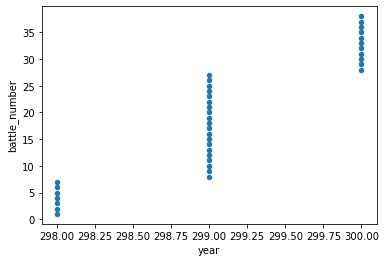

In [24]:
df_sub = df[['year', 'battle_number']] 
df_sub.plot.scatter(x='year', y='battle_number')

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='battle_number', ylabel='year'>,
        <AxesSubplot:xlabel='Death Year', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='battle_number'>,
        <AxesSubplot:xlabel='battle_number', ylabel='battle_number'>,
        <AxesSubplot:xlabel='Death Year', ylabel='battle_number'>],
       [<AxesSubplot:xlabel='year', ylabel='Death Year'>,
        <AxesSubplot:xlabel='battle_number', ylabel='Death Year'>,
        <AxesSubplot:xlabel='Death Year', ylabel='Death Year'>]],
      dtype=object)

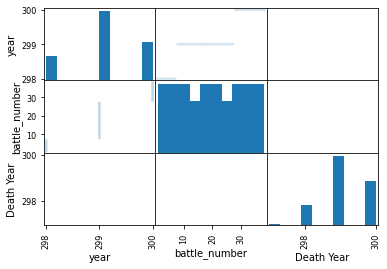

In [26]:
from pandas.plotting import scatter_matrix 
df_sub1 = df[['year', 'battle_number', 'Death Year']]
scatter_matrix(df_sub1,alpha=0.2)

In [28]:
df_missing=df.copy()
df_missing.loc[0,'age']=np.nan
print(df_missing[df_missing['age'].isnull()])

                               name   year  battle_number  \
0        Battle of the Golden Tooth  298.0            1.0   
1       Battle at the Mummer's Ford  298.0            2.0   
2                Battle of Riverrun  298.0            3.0   
3          Battle of the Green Fork  298.0            4.0   
4     Battle of the Whispering Wood  298.0            5.0   
...                             ...    ...            ...   
1939                            Meg    NaN            NaN   
1941                          Luwin    NaN            NaN   
1942                           Reek    NaN            NaN   
1943               Symeon Star-Eyes    NaN            NaN   
1944                      Coldhands    NaN            NaN   

                 attacker_king             defender_king attacker_1  \
0     Joffrey/Tommen Baratheon                Robb Stark  Lannister   
1     Joffrey/Tommen Baratheon                Robb Stark  Lannister   
2     Joffrey/Tommen Baratheon                Robb Sta

In [31]:
df.loc[df['year']>=22,['year','battle_number']].head()

,year,battle_number
0,298.0,1.0
1,298.0,2.0
2,298.0,3.0
3,298.0,4.0
4,298.0,5.0


In [32]:
df.rename(columns = {"year": "YEAR"}, inplace = True) 
df.head()

,name,YEAR,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Battle of the Golden Tooth,298.0,1.0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Battle at the Mummer's Ford,298.0,2.0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Battle of Riverrun,298.0,3.0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Battle of the Green Fork,298.0,4.0,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Battle of the Whispering Wood,298.0,5.0,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
new_dataset=df[['YEAR','battle_number','defender_size']] 
new_dataset.head()

,YEAR,battle_number,defender_size
0,298.0,1.0,4000.0
1,298.0,2.0,120.0
2,298.0,3.0,10000.0
3,298.0,4.0,20000.0
4,298.0,5.0,6000.0


In [36]:
drop_df=df.drop(['isAliveSpouse','isMarried'],axis=1) 
drop_df.head()

,name,YEAR,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,isAliveMother,isAliveFather,isAliveHeir,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Battle of the Golden Tooth,298.0,1.0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Battle at the Mummer's Ford,298.0,2.0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Battle of Riverrun,298.0,3.0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Battle of the Green Fork,298.0,4.0,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Battle of the Whispering Wood,298.0,5.0,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
